# 支持向量机

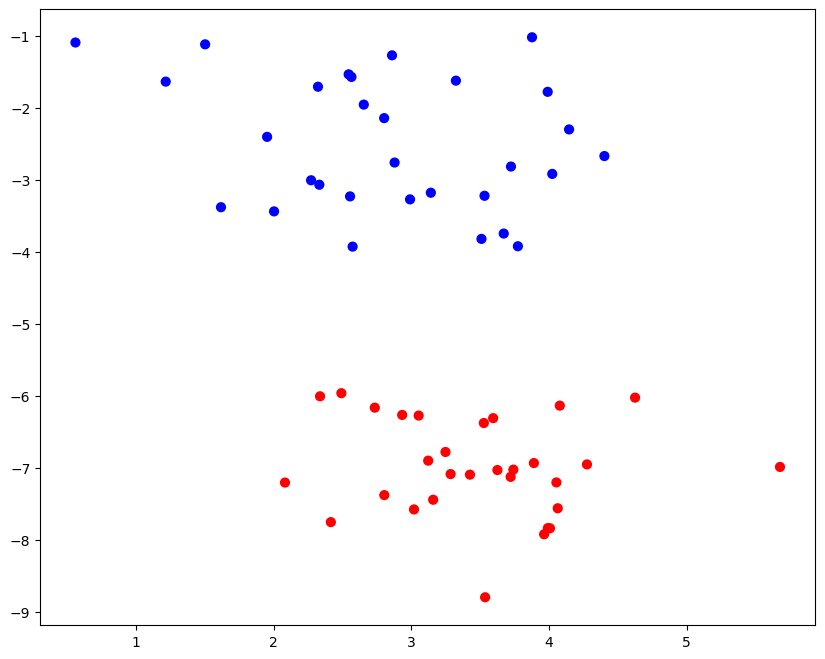

In [6]:
# 演示支持向量机的分类过程
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

# 生成团状数据
x, y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8)  # 生成示例数据

plt.figure(figsize=(10, 8))  # 绘图
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

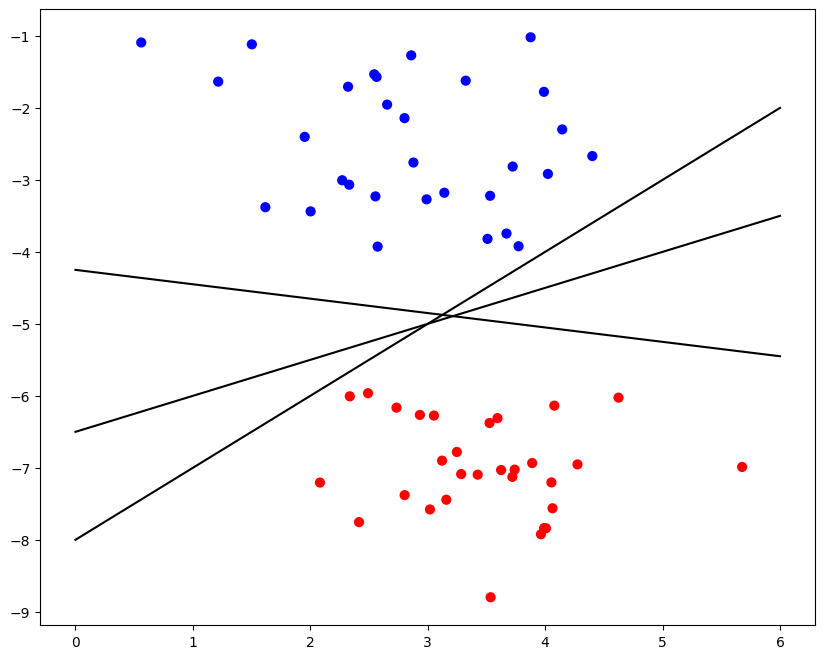

In [7]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

# 绘制 3 条不同的分割线
x_temp = np.linspace(0, 6)
for m, b in [(1, -8), (0.5, -6.5), (-0.2, -4.25)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, "-k")

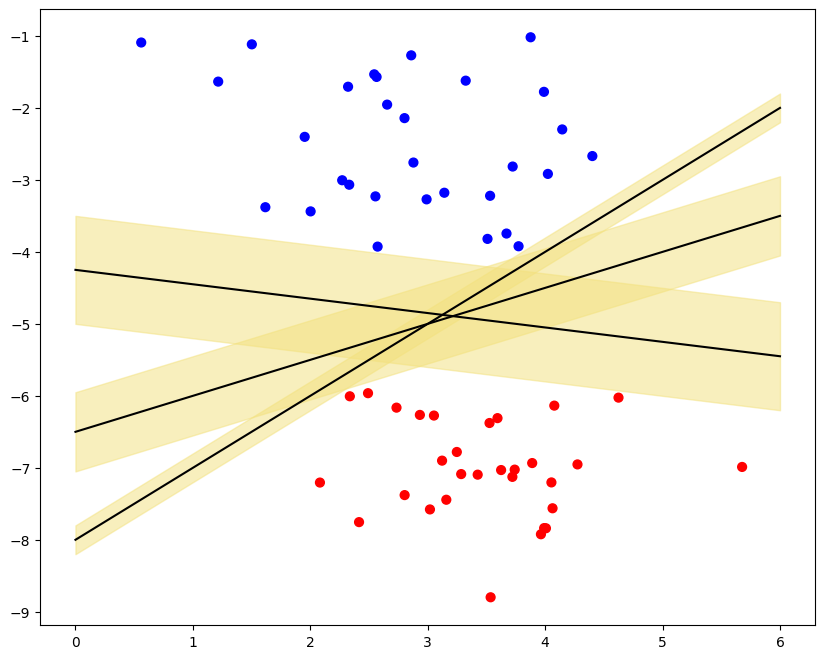

In [8]:
# 使用fill_between方法手动绘制出分类间隔
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

# 绘制 3 条不同的分割线
x_temp = np.linspace(0, 6)
for m, b, d in [(1, -8, 0.2), (0.5, -6.5, 0.55), (-0.2, -4.25, 0.75)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, "-k")
    plt.fill_between(x_temp, y_temp - d, y_temp + d, color="#f3e17d", alpha=0.5)

数学推导好难，不想看了，以后用到再说，链接在下面
https://aibydoing.com/notebooks/chapter02-08-lab-support-vector-machines-implementation-and-applications

In [3]:
# 线性支持向量机分类实现
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")
linear_svc.fit(x, y)
linear_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

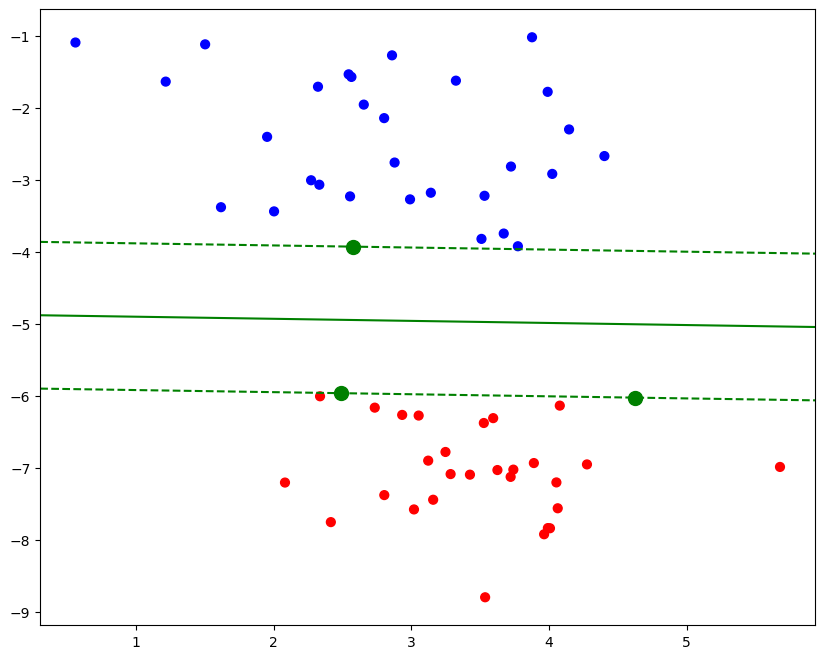

In [9]:
# 绘制训练完成的支持向量机对应的分割线和间隔
def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )

# 绘制最大间隔支持向量图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

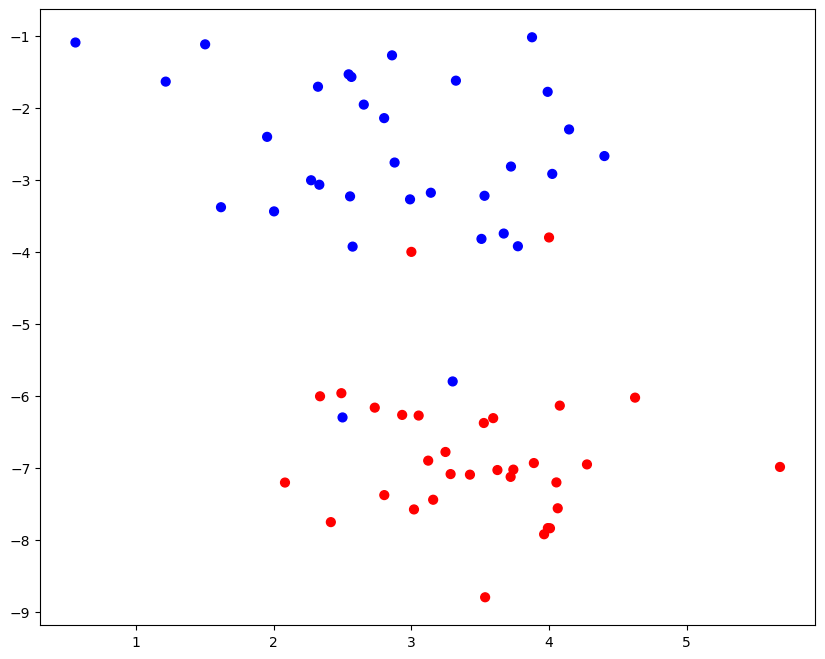

In [10]:
# 引入噪声观察分类效果
# 向原数据集中加入噪声点
x = np.concatenate((x, np.array([[3, -4], [4, -3.8], [2.5, -6.3], [3.3, -5.8]])))
y = np.concatenate((y, np.array([1, 1, 0, 0])))

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

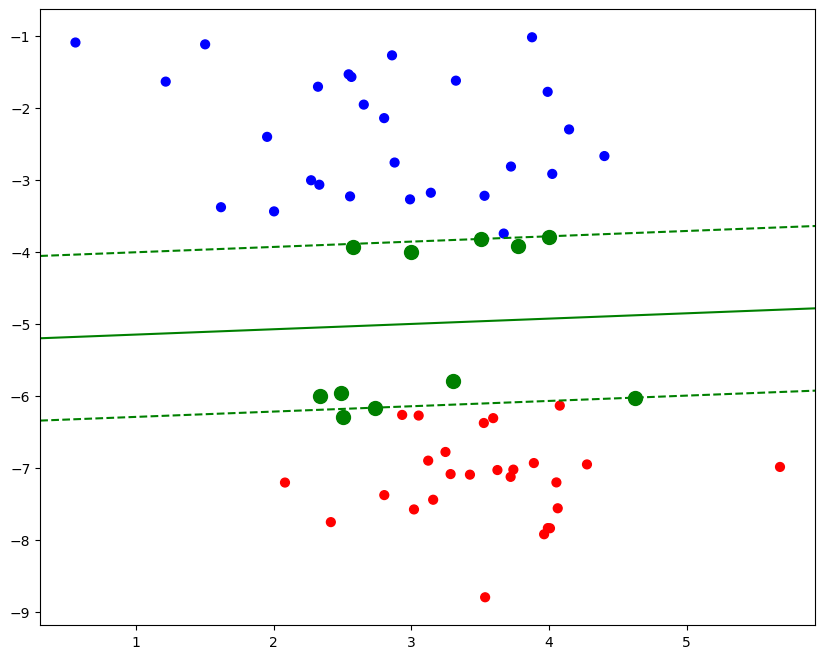

In [11]:
# 重新训练
linear_svc.fit(x, y)  # 训练

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

In [12]:
from ipywidgets import interact
import ipywidgets as widgets


def change_c(c):
    linear_svc.C = c
    linear_svc.fit(x, y)
    plt.figure(figsize=(10, 8))
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
    svc_plot(linear_svc)


interact(change_c, c=[1, 10000, 1000000])

interactive(children=(Dropdown(description='c', options=(1, 10000, 1000000), value=1), Output()), _dom_classes…

<function __main__.change_c(c)>

对于线性不可分的数据集，我们也可以通过支持向量机去完成分类。但是，这里需要增加一个技巧把线性不可分数据转换为线性可分数据之后，再完成分类

把这种数据转换的技巧称作「核技巧」，实现数据转换的函数称之为「核函数」


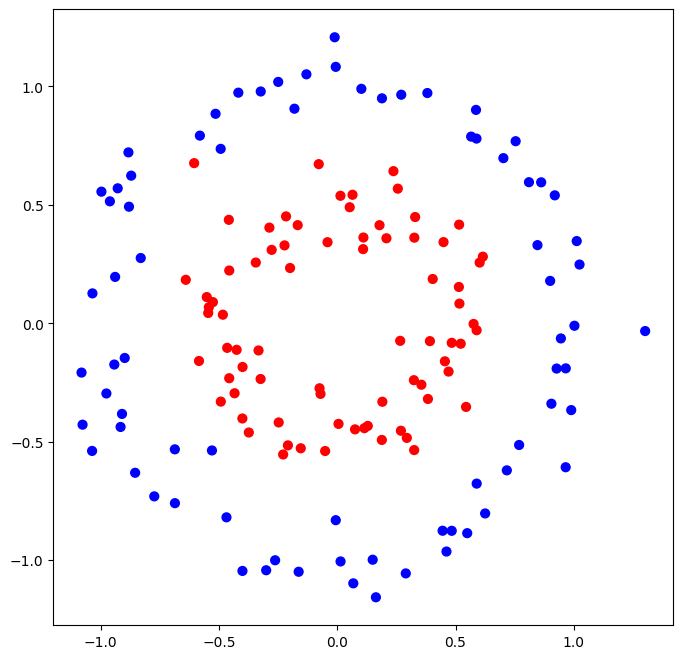

In [13]:
# 非线性支持向量机分类实现
from sklearn.datasets import make_circles

x2, y2 = make_circles(150, factor=0.5, noise=0.1, random_state=30)  # 生成示例数据

plt.figure(figsize=(8, 8))  # 绘图
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

Text(0.5, 0, 'r')

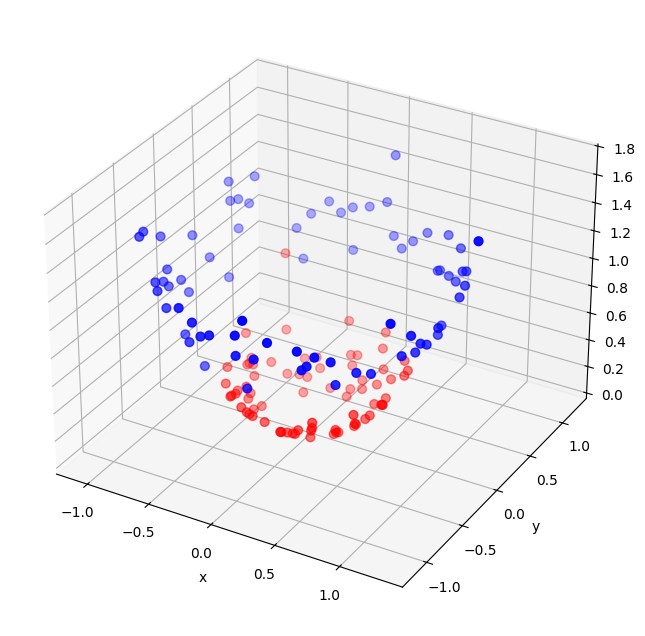

In [14]:
# 一个简单的非线性映射
def kernel_function(xi, xj):
    poly = xi**2 + xj**2
    return poly

from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = kernel_function(x2[:, 0], x2[:, 1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection="3d")
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap="bwr")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("r")

In [15]:
rbf_svc = SVC(kernel="rbf", gamma="auto")
rbf_svc.fit(x2, y2)

SVC(gamma='auto')

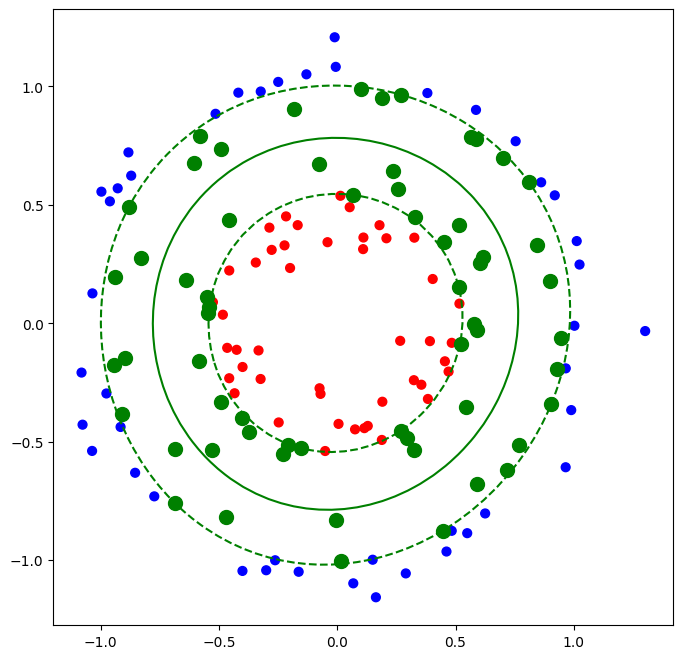

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

svc_plot(rbf_svc)